<a href="https://colab.research.google.com/github/mozey256/OSCAAR/blob/main/Organized_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocess the dataset


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [ ]:
df = pd.read_csv('ML_training_data.csv')

In [ ]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['Synergy'])  # Features
y = df['Synergy']  # Target variable

# Convert categorical labels to binary labels
y_binary = y.replace({'No': 0, 'Yes': 1})

In [ ]:
df.head()

,Drug 1,Drug2,Combination,0,1,2,3,4,5,6,...,Joint_Substructure_159,Joint_Substructure_160,Joint_Substructure_161,Joint_Substructure_162,Joint_Substructure_163,Joint_Substructure_164,Joint_Substructure_165,Joint_Substructure_166,Joint_Substructure_167,Synergy
0,2aminobenzothiazole,fluconazole,2aminobenzothiazole+fluconazole,0,0,1,1,1,1,1,...,2,0,0,2,2,2,1,2,0,No
1,2hydroxyethylhydrazine,fluconazole,2hydroxyethylhydrazine+fluconazole,0,0,1,2,1,2,2,...,2,0,0,2,1,1,2,1,0,No
2,3aminotriazole,fluconazole,3aminotriazole+fluconazole,0,1,2,1,1,1,1,...,2,0,0,2,2,1,1,2,0,No
3,4hydroxytamoxifene,fluconazole,4hydroxytamoxifene+fluconazole,1,1,1,1,1,1,1,...,2,1,1,2,2,2,2,2,0,No
4,A23187,fluconazole,A23187+fluconazole,1,1,2,1,1,1,1,...,2,1,1,2,2,2,2,2,0,No


In [ ]:
label_encoder = preprocessing.LabelEncoder()

df['Drug 1'] = label_encoder.fit_transform(df['Drug 1'])
df['Drug2'] = label_encoder.fit_transform(df['Drug2'])

In [ ]:
df['Synergy'] = df['Synergy'].replace({'No': 0, 'Yes': 1})

In [ ]:
df.drop(columns =['Combination'], inplace =True)

In [ ]:
df.head()

,Drug 1,Drug2,0,1,2,3,4,5,6,7,...,Joint_Substructure_159,Joint_Substructure_160,Joint_Substructure_161,Joint_Substructure_162,Joint_Substructure_163,Joint_Substructure_164,Joint_Substructure_165,Joint_Substructure_166,Joint_Substructure_167,Synergy
0,0,13,0,0,1,1,1,1,1,1,...,2,0,0,2,2,2,1,2,0,0
1,1,13,0,0,1,2,1,2,2,2,...,2,0,0,2,1,1,2,1,0,0
2,2,13,0,1,2,1,1,1,1,1,...,2,0,0,2,2,1,1,2,0,0
3,3,13,1,1,1,1,1,1,1,1,...,2,1,1,2,2,2,2,2,0,0
4,5,13,1,1,2,1,1,1,1,1,...,2,1,1,2,2,2,2,2,0,0


# Split and Balance the *data*

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(columns = ['Synergy'])
y= df['Synergy']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.2, random_state =42)

balance the data

In [ ]:
smote = SMOTE(random_state =42)

In [ ]:
X_train1, y_train1 = smote.fit_resample(X_train, y_train)

In [ ]:
Xtrain , X_val, ytrain, y_val = train_test_split(X_train1, y_train1, test_size=0.2, random_state =42)

# Pycaret

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 18.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB

In [ ]:
from pycaret.classification import *

In [ ]:
data = pd.concat([Xtrain, ytrain], axis =1)

In [ ]:
clf = setup(data, target ='Synergy')

/usr/local/lib/python3.10/dist-packages/pycaret/internal/pipeline.py:249: UserWarning: Persisting input arguments took 1.62s to run.If this happens often in your code, it can cause performance problems (results will be correct in all cases). The reason for this is probably some large input arguments for a wrapped function.
  fitted_transformer = self._memory_fit(
/usr/local/lib/python3.10/dist-packages/pycaret/internal/pipeline.py:256: UserWarning: Persisting input arguments took 1.37s to run.If this happens often in your code, it can cause performance problems (results will be correct in all cases). The reason for this is probably some large input arguments for a wrapped function.
  X, y = self._memory_transform(
/usr/local/lib/python3.10/dist-packages/pycaret/internal/pipeline.py:289: UserWarning: Persisting input arguments took 0.73s to run.If this happens often in your code, it can cause performance problems (results will be correct in all cases). The reason for this is probably so

,Description,Value
0,Session id,6064
1,Target,Synergy
2,Target type,Binary
3,Original data shape,"(256, 1621)"
4,Transformed data shape,"(256, 1621)"
5,Transformed train set shape,"(179, 1621)"
6,Transformed test set shape,"(77, 1621)"
7,Numeric features,1620
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8889,0.9623,0.8444,0.9317,0.8751,0.7778,0.7902,0.5310
dt,Decision Tree Classifier,0.8882,0.8882,0.9000,0.8935,0.8896,0.7764,0.7885,0.5820
rf,Random Forest Classifier,0.8833,0.9617,0.8667,0.9114,0.8769,0.7667,0.7836,0.7850
ada,Ada Boost Classifier,0.8778,0.9296,0.8889,0.8814,0.8769,0.7556,0.7690,0.7690
gbc,Gradient Boosting Classifier,0.8778,0.9593,0.9111,0.8699,0.8822,0.7556,0.7704,0.7940
nb,Naive Bayes,0.8775,0.8778,0.8000,0.9535,0.8589,0.7549,0.7737,0.4770
xgboost,Extreme Gradient Boosting,0.8611,0.9605,0.9000,0.8536,0.8653,0.7222,0.7394,1.5720
lightgbm,Light Gradient Boosting Machine,0.8441,0.9395,0.8667,0.8525,0.8499,0.6883,0.7048,1.1230
lr,Logistic Regression,0.8386,0.9284,0.8222,0.8728,0.8274,0.6772,0.6986,1.1870
ridge,Ridge Classifier,0.8333,0.9074,0.8556,0.8392,0.8374,0.6667,0.6820,0.3760


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

# Train and Test the model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
rf = RandomForestClassifier(random_state= 42)

rf. fit(Xtrain, ytrain)

print(classification_report(y_val, rf.predict(X_val)))
print(confusion_matrix(y_val, rf.predict(X_val)))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        33
           1       0.94      0.94      0.94        31

    accuracy                           0.94        64
   macro avg       0.94      0.94      0.94        64
weighted avg       0.94      0.94      0.94        64

[[31  2]
 [ 2 29]]


In [ ]:
print(classification_report(y_test, rf.predict(X_test)))
print(confusion_matrix(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86        41
           1       0.00      0.00      0.00         9

    accuracy                           0.76        50
   macro avg       0.40      0.46      0.43        50
weighted avg       0.66      0.76      0.71        50

[[38  3]
 [ 9  0]]


In [ ]:
important = rf.feature_importances_
selected = np.where(important >0)[0]

print(len(selected))
X_train_selected = Xtrain.iloc[:, selected]
X_test_selected =  X_test.iloc[:, selected]
X_val_selected = X_val.iloc[:, selected]

828


In [ ]:
rf_important = RandomForestClassifier(random_state= 10, n_estimators = 500 ,max_depth = 5, max_features = 'log2', oob_score= True)

rf_important. fit(X_train_selected, ytrain)

print(classification_report(y_val, rf_important.predict(X_val_selected)))
print(confusion_matrix(y_val, rf_important.predict(X_val_selected)))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        33
           1       0.88      0.94      0.91        31

    accuracy                           0.91        64
   macro avg       0.91      0.91      0.91        64
weighted avg       0.91      0.91      0.91        64

[[29  4]
 [ 2 29]]


In [ ]:
print(classification_report(y_test, rf_important.predict(X_test_selected)))
print(confusion_matrix(y_test, rf_important.predict(X_test_selected)))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        41
           1       0.30      0.33      0.32         9

    accuracy                           0.74        50
   macro avg       0.57      0.58      0.58        50
weighted avg       0.75      0.74      0.75        50

[[34  7]
 [ 6  3]]


In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the random grid
random_grid = {
  'random_state': [10],
  'n_estimators': [1000, 500, 1000]
 }

rf1 = RandomForestClassifier(n_estimators = 500, random_state = 42, max_depth = 3, max_features = 'log2')
rf_random = GridSearchCV(rf1, random_grid, cv = 3)
# Fit the random search model
rf_random.fit(X_train_selected, ytrain)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='log2',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              monotonic_cst=None,
                                              n_estimators=500, n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             n_jobs=None,
             param_grid={'n_estimators': [1000, 500, 1000],
                         'random_state': [10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(classification_report(y_val, rf_random.predict(X_val_selected)))
print(confusion_matrix(y_val, rf_random.predict(X_val_selected)))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89        33
           1       0.88      0.90      0.89        31

    accuracy                           0.89        64
   macro avg       0.89      0.89      0.89        64
weighted avg       0.89      0.89      0.89        64

[[29  4]
 [ 3 28]]


In [ ]:

print(classification_report(y_test, rf_random.predict(X_test_selected)))
print(confusion_matrix(y_test, rf_random.predict(X_test_selected)))

              precision    recall  f1-score   support

           0       0.89      0.80      0.85        41
           1       0.38      0.56      0.45         9

    accuracy                           0.76        50
   macro avg       0.64      0.68      0.65        50
weighted avg       0.80      0.76      0.78        50

[[33  8]
 [ 4  5]]


# Gradient Booster

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state= 42, n_estimators = 1000, learning_rate = 0.05)

gbc.fit(Xtrain, ytrain)

print(classification_report(y_val, gbc.predict(X_val)))
print(confusion_matrix(y_val, gbc.predict(X_val)))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        33
           1       0.89      1.00      0.94        31

    accuracy                           0.94        64
   macro avg       0.94      0.94      0.94        64
weighted avg       0.94      0.94      0.94        64

[[29  4]
 [ 0 31]]


In [ ]:
print(classification_report(y_test, gbc.predict(X_test)))
print(confusion_matrix(y_test, gbc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        41
           1       0.38      0.33      0.35         9

    accuracy                           0.78        50
   macro avg       0.62      0.61      0.61        50
weighted avg       0.77      0.78      0.77        50

[[36  5]
 [ 6  3]]


In [ ]:
important_features = gbc.feature_importances_
importantF = np.where(important_features >0)[0]

Xtrain_selected =  Xtrain.iloc[:, importantF]
Xtest_selected = X_test.iloc[:, importantF]
Xval_selected = X_val.iloc[:, importantF]

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc2 = GradientBoostingClassifier(random_state= 10, n_estimators = 500, learning_rate = 0.05)

gbc2.fit(Xtrain_selected, ytrain)

print(classification_report(y_val, gbc2.predict(Xval_selected)))
print(confusion_matrix(y_val, gbc2.predict(Xval_selected)))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        33
           1       0.89      1.00      0.94        31

    accuracy                           0.94        64
   macro avg       0.94      0.94      0.94        64
weighted avg       0.94      0.94      0.94        64

[[29  4]
 [ 0 31]]


In [ ]:
print(classification_report(y_test, gbc2.predict(Xtest_selected)))
print(confusion_matrix(y_test, gbc2.predict(Xtest_selected)))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        41
           1       0.30      0.33      0.32         9

    accuracy                           0.74        50
   macro avg       0.57      0.58      0.58        50
weighted avg       0.75      0.74      0.75        50

[[34  7]
 [ 6  3]]


In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the random grid
random_grid = {
  'random_state': [10],
  'n_estimators': [1000, 500, 1000],
  'learning_rate': [0.00005,0.0005, 0.005],
  'max_depth': [2,3,4]
 }

gbc1 = GradientBoostingClassifier(n_estimators = 1000, random_state = 10, max_depth = 2, subsample = 0.5, learning_rate = 0.0005)
rf_random = GridSearchCV(gbc1, random_grid, cv = 4)
# Fit the random search model
rf_random.fit(Xtrain_selected, ytrain)

GridSearchCV(cv=4, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None,
                                                  learning_rate=0.0005,
                                                  loss='log_loss', max_depth=2,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=1000,
                                                  n_iter_no_change=None,
                                                  random_state=10,
                                                  subsample=0.5, tol=0.0001,
                                                  validation_fraction=0.1,
                                                  verbose=0, warm_start=False),
             n_jobs=None,
             param_grid={'learning_rate': [5e-05, 0.0005, 0.005],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [1000, 500, 1000],
                         'random_state': [10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(classification_report(y_val, rf_random.predict(Xval_selected)))
print(confusion_matrix(y_val, rf_random.predict(Xval_selected)))

              precision    recall  f1-score   support

           0       0.97      0.85      0.90        33
           1       0.86      0.97      0.91        31

    accuracy                           0.91        64
   macro avg       0.91      0.91      0.91        64
weighted avg       0.91      0.91      0.91        64

[[28  5]
 [ 1 30]]


In [ ]:
print(classification_report(y_test, rf_random.predict(Xtest_selected)))
print(confusion_matrix(y_test, rf_random.predict(Xtest_selected)))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        41
           1       0.50      0.44      0.47         9

    accuracy                           0.82        50
   macro avg       0.69      0.67      0.68        50
weighted avg       0.81      0.82      0.82        50

[[37  4]
 [ 5  4]]


# *Ensemble  lr, dt, rf, gbc, svc , knn*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "k-NN": KNeighborsClassifier()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(Xtrain, ytrain)
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    clf = confusion_matrix(y_test, y_pred)

    # Print results
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(clf)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier: Logistic Regression
Accuracy: 0.74
Precision: 0.57
Recall: 0.58
F1 Score: 0.58
[[34  7]
 [ 6  3]]
Classifier: Decision Tree
Accuracy: 0.64
Precision: 0.54
Recall: 0.56
F1 Score: 0.53
[[28 13]
 [ 5  4]]
Classifier: Random Forest
Accuracy: 0.78
Precision: 0.54
Recall: 0.52
F1 Score: 0.51
[[38  3]
 [ 8  1]]
Classifier: Gradient Boosting
Accuracy: 0.76
Precision: 0.62
Recall: 0.64
F1 Score: 0.62
[[34  7]
 [ 5  4]]
Classifier: SVM
Accuracy: 0.54
Precision: 0.45
Recall: 0.42
F1 Score: 0.42
[[25 16]
 [ 7  2]]
Classifier: k-NN
Accuracy: 0.52
Precision: 0.49
Recall: 0.49
F1 Score: 0.45
[[22 19]
 [ 5  4]]


In [ ]:
from sklearn.ensemble import VotingClassifier

# Define the individual classifiers
classifiers = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier())
]

# Create the ensemble model
ensemble_model = VotingClassifier(classifiers)

# Train the ensemble model
ensemble_model.fit(Xtrain, ytrain)

# Evaluate the ensemble model
accuracy = ensemble_model.score(X_test, y_test)
print(f"Ensemble Model Accuracy: {accuracy:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ensemble Model Accuracy: 0.78


In [ ]:
print(classification_report(y_test, ensemble_model.predict(X_test)))
print(confusion_matrix(y_test, ensemble_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.93      0.87        41
           1       0.25      0.11      0.15         9

    accuracy                           0.78        50
   macro avg       0.54      0.52      0.51        50
weighted avg       0.72      0.78      0.74        50

[[38  3]
 [ 8  1]]


Random Forest Accuracy: 0.82
Random Forest AUC: 0.67


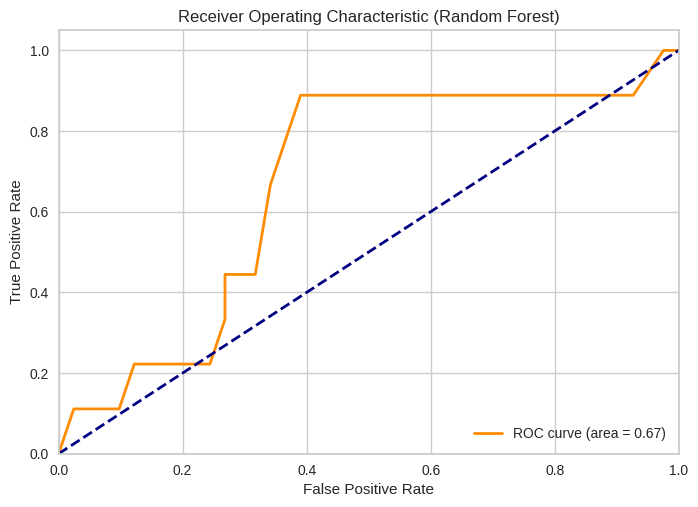

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Convert categorical labels to binary labels
y_test_binary = y_test.replace({'No': 0, 'Yes': 1})

# Train the Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

# Calculate ROC curve and AUC score
if hasattr(rf_classifier, "predict_proba"):
    prob_pos_rf = rf_classifier.predict_proba(X_test)[:, 1]
else:  # use decision function
    prob_pos_rf = rf_classifier.decision_function(X_test)
    prob_pos_rf = (prob_pos_rf - prob_pos_rf.min()) / (prob_pos_rf.max() - prob_pos_rf.min())

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_binary, prob_pos_rf)
auc_rf = roc_auc_score(y_test_binary, prob_pos_rf)
print(f"Random Forest AUC: {auc_rf:.2f}")

# Plot ROC curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.legend(loc="lower right")
plt.show()



# New Section